Cleaned data saved to cleaned_learner_engagement.csv


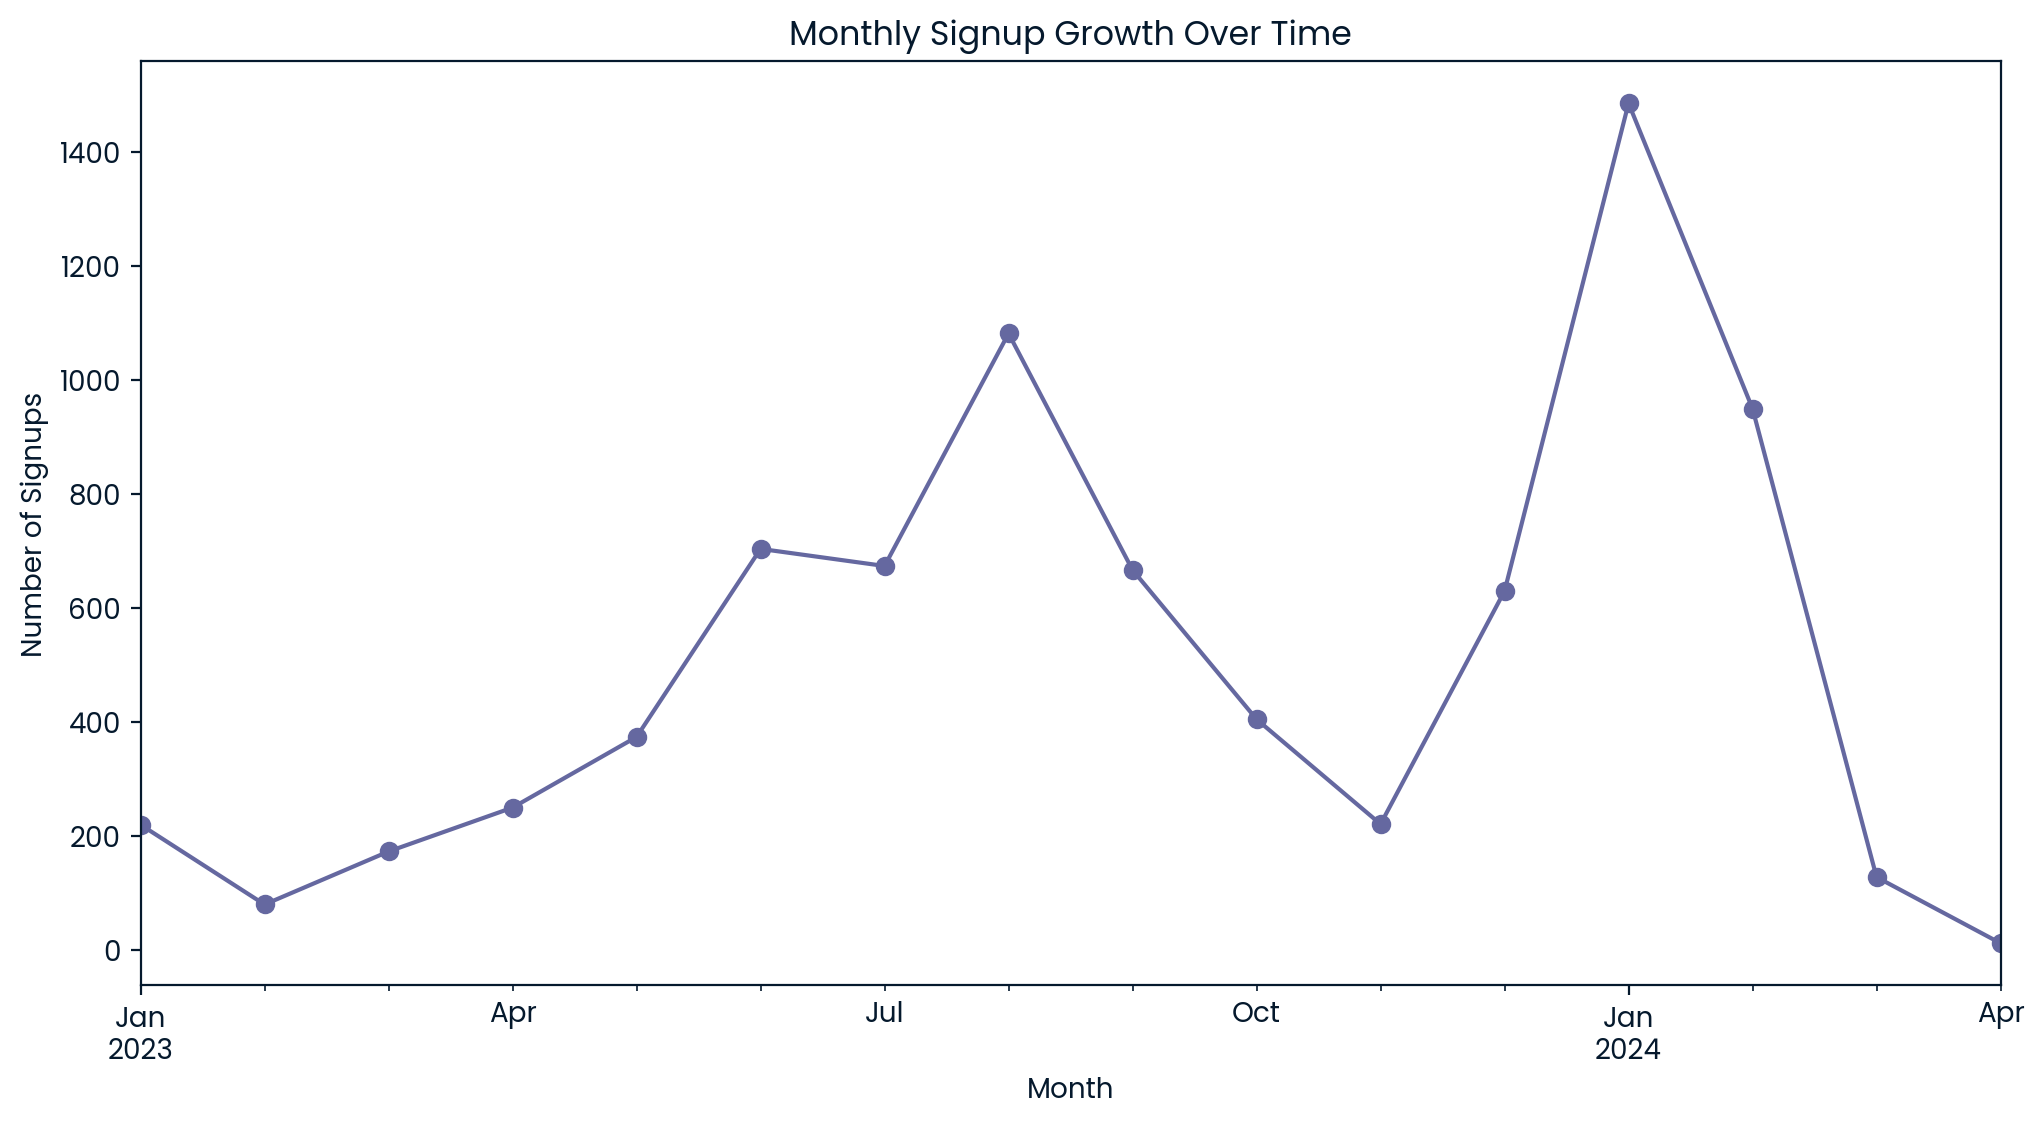

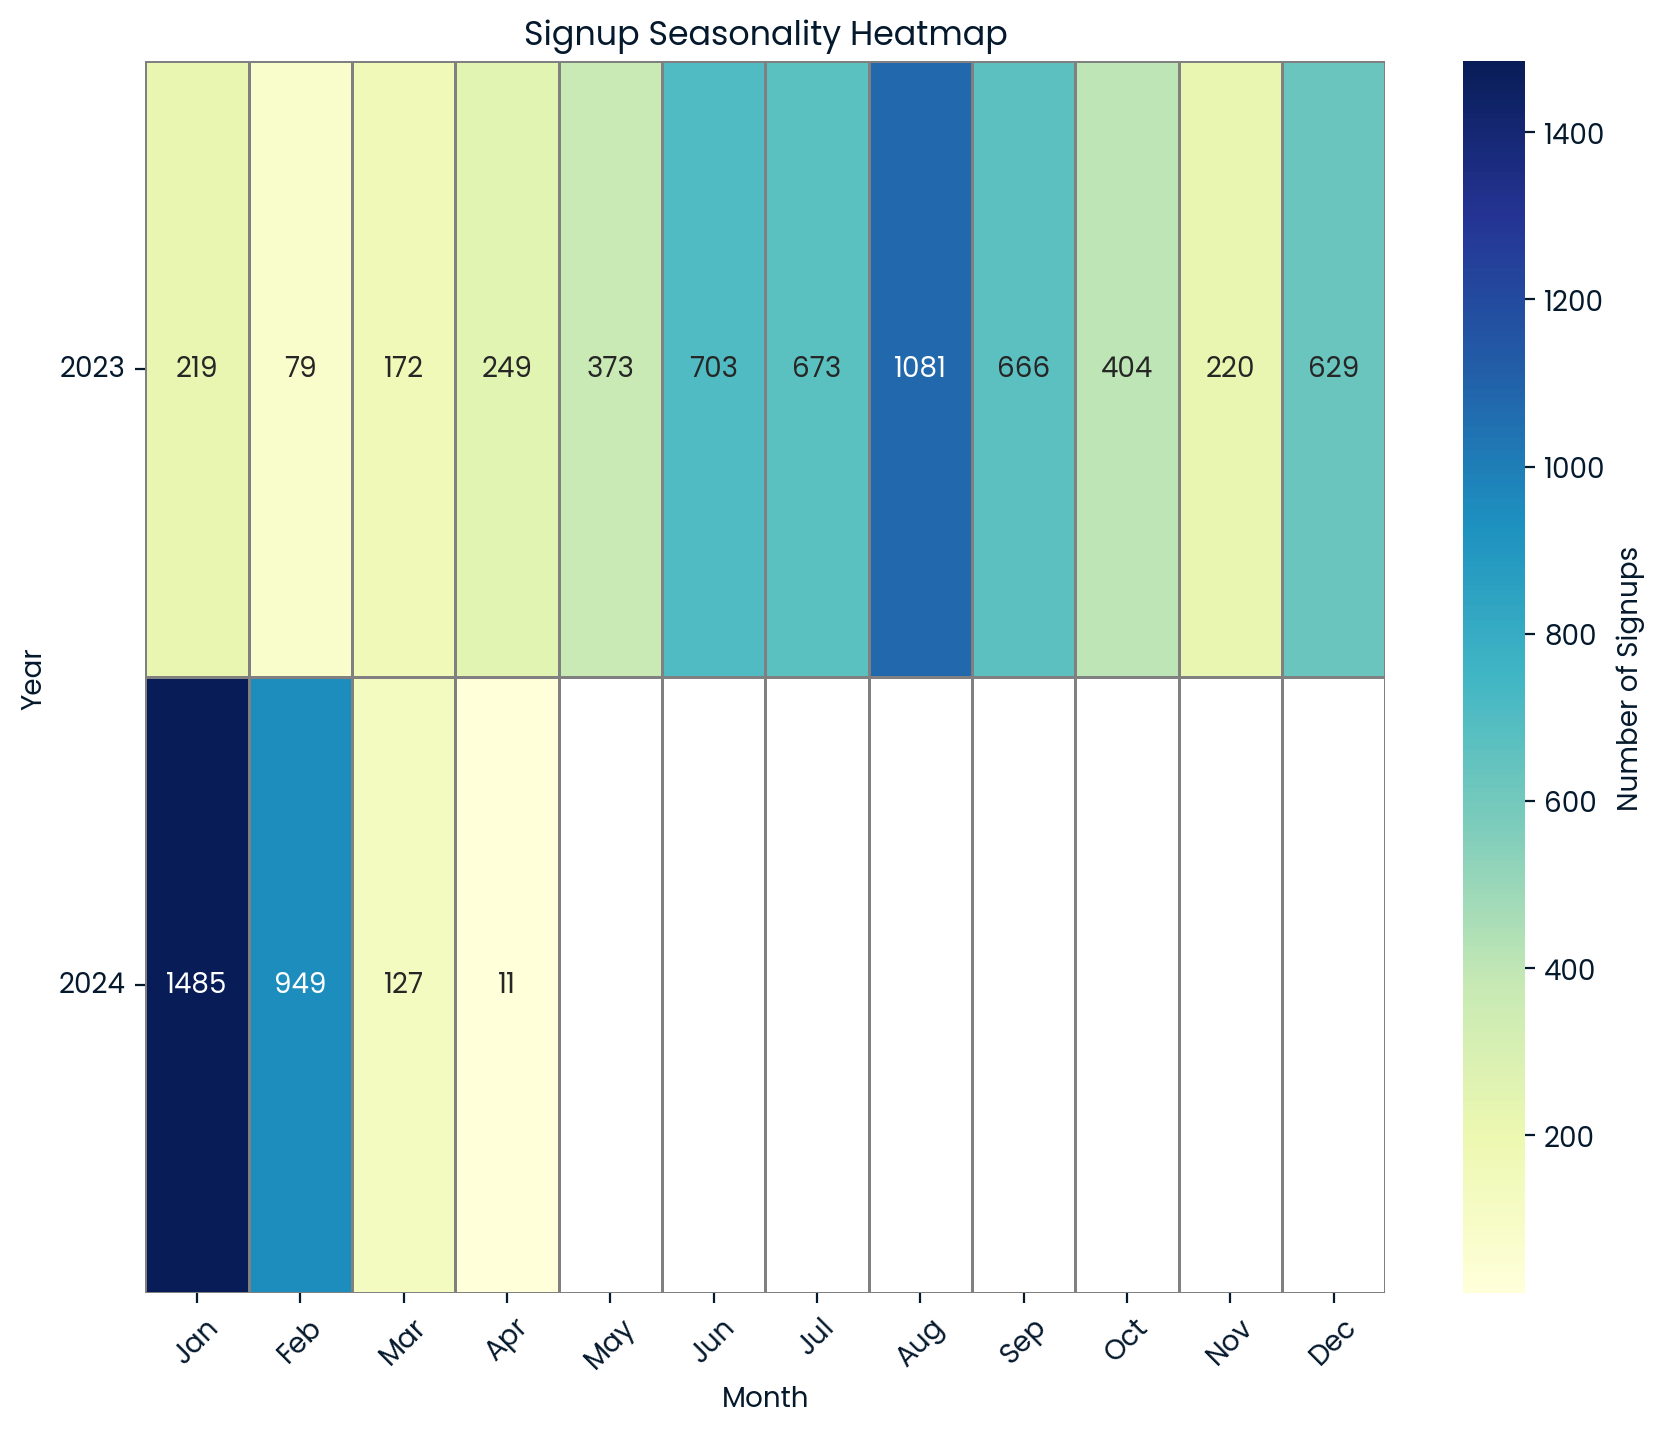

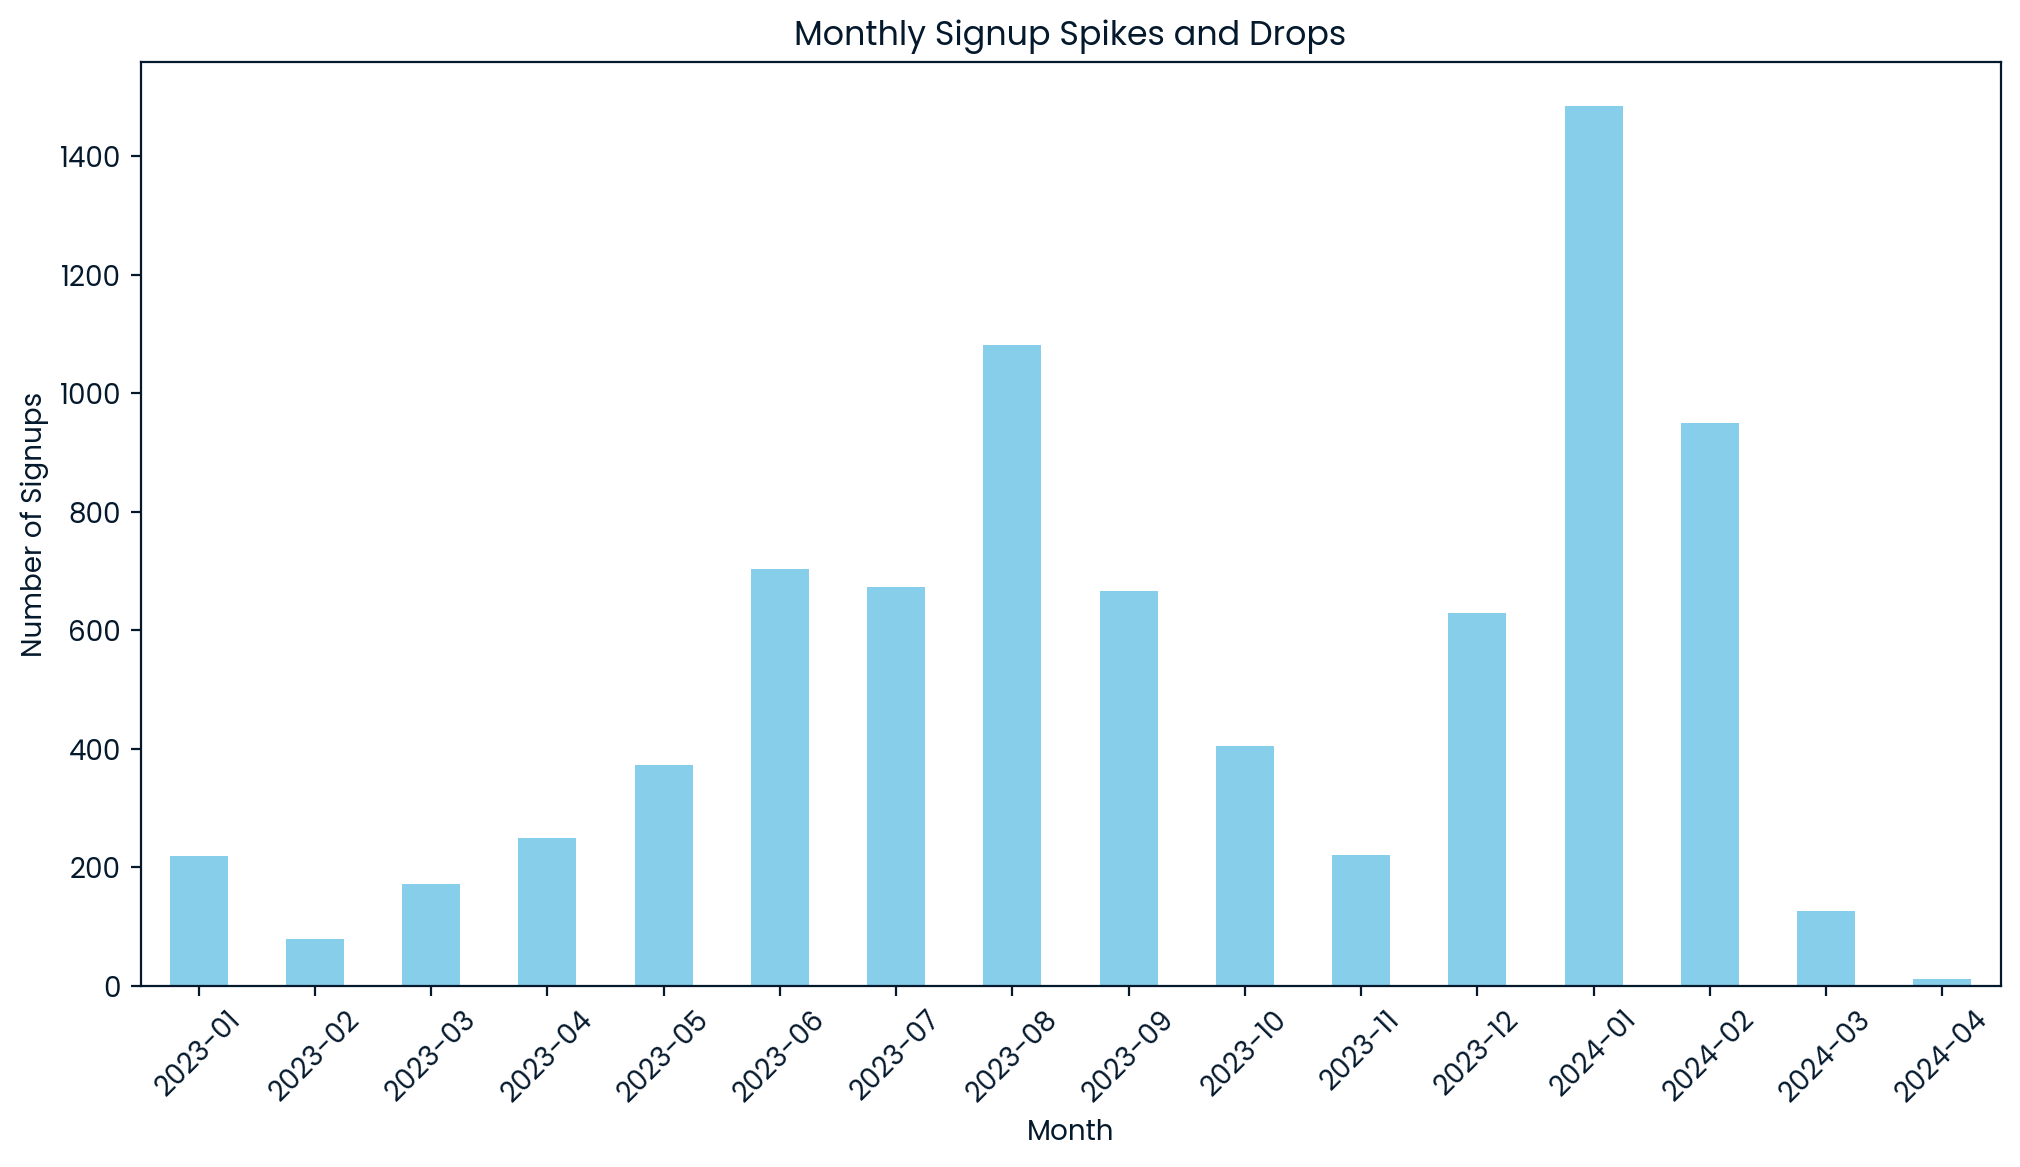

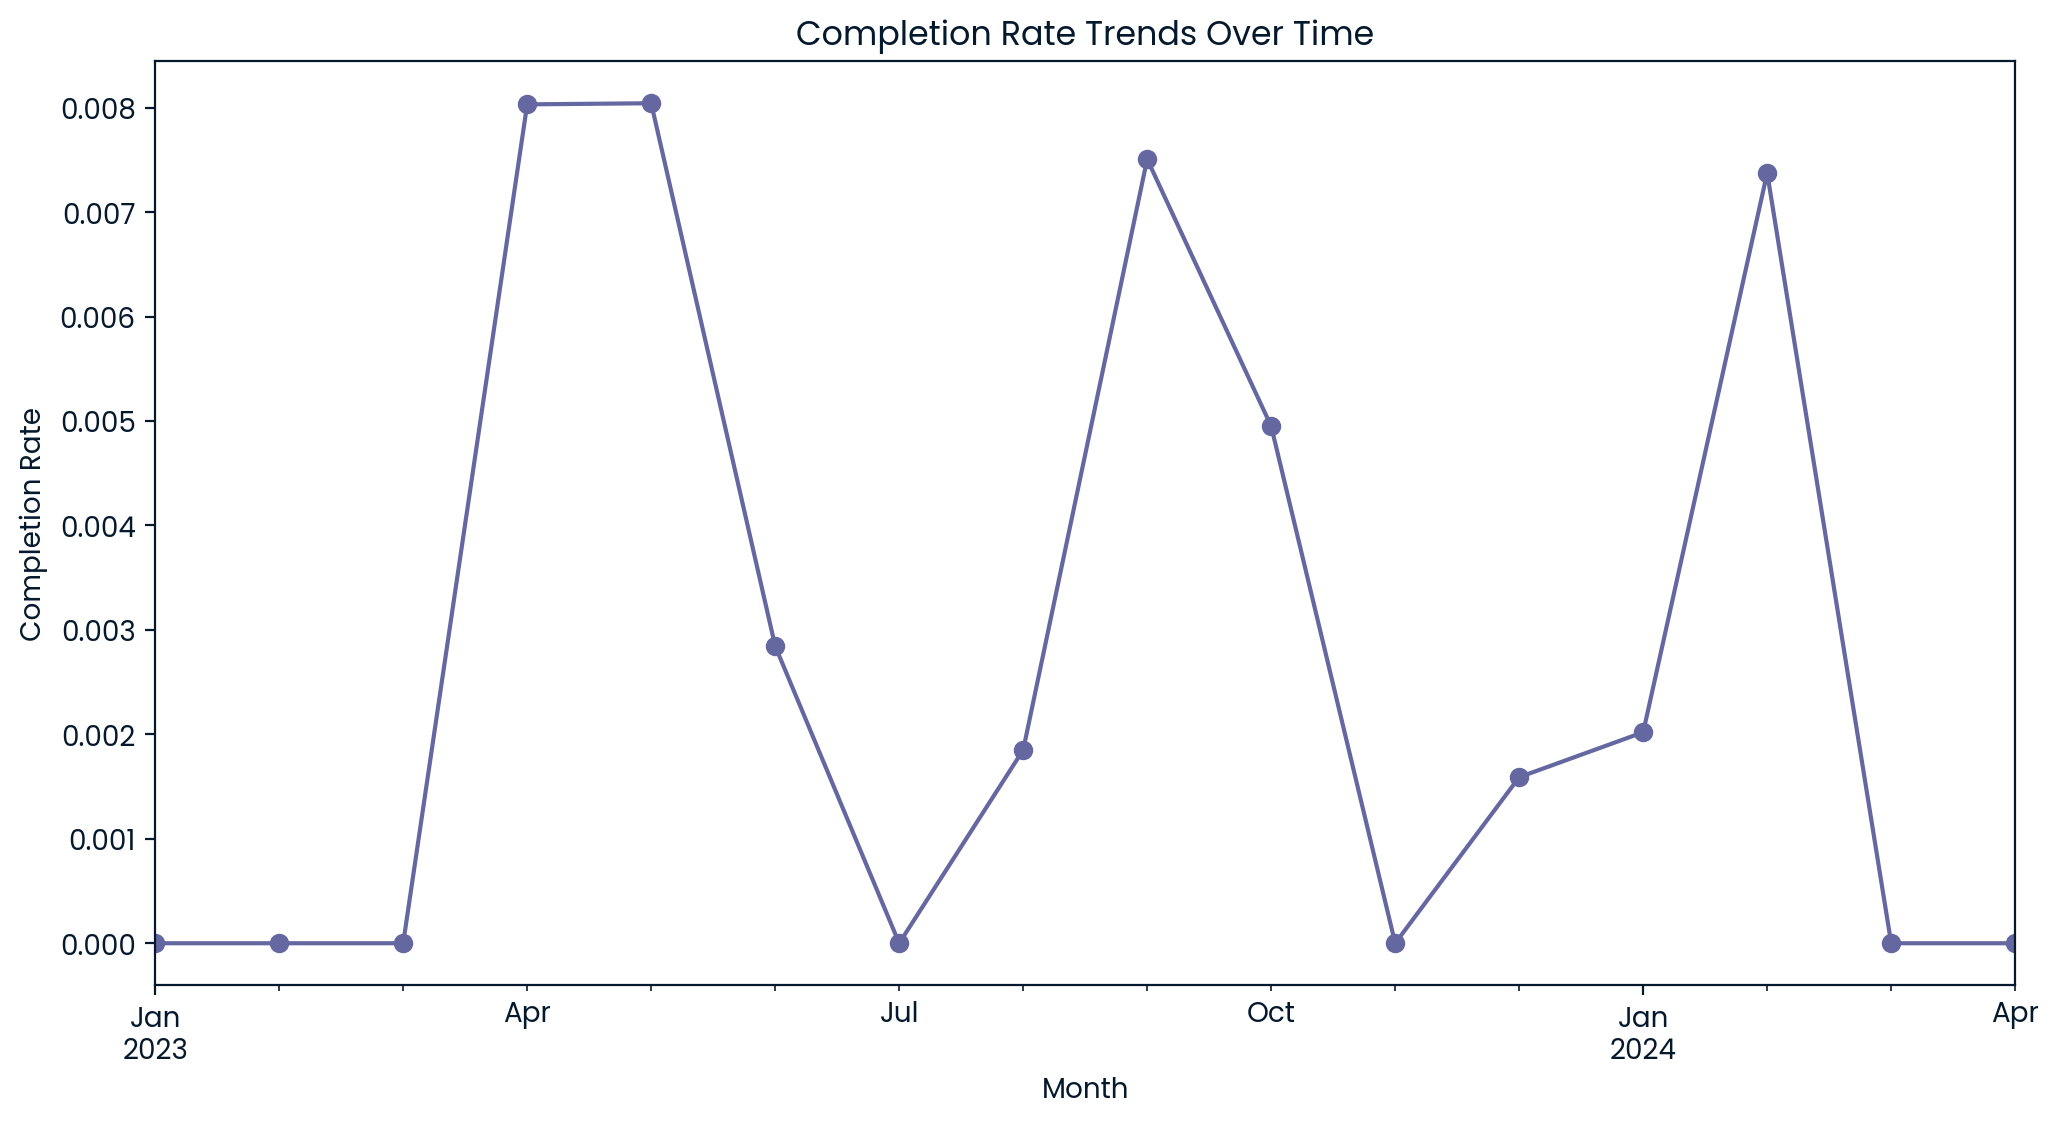

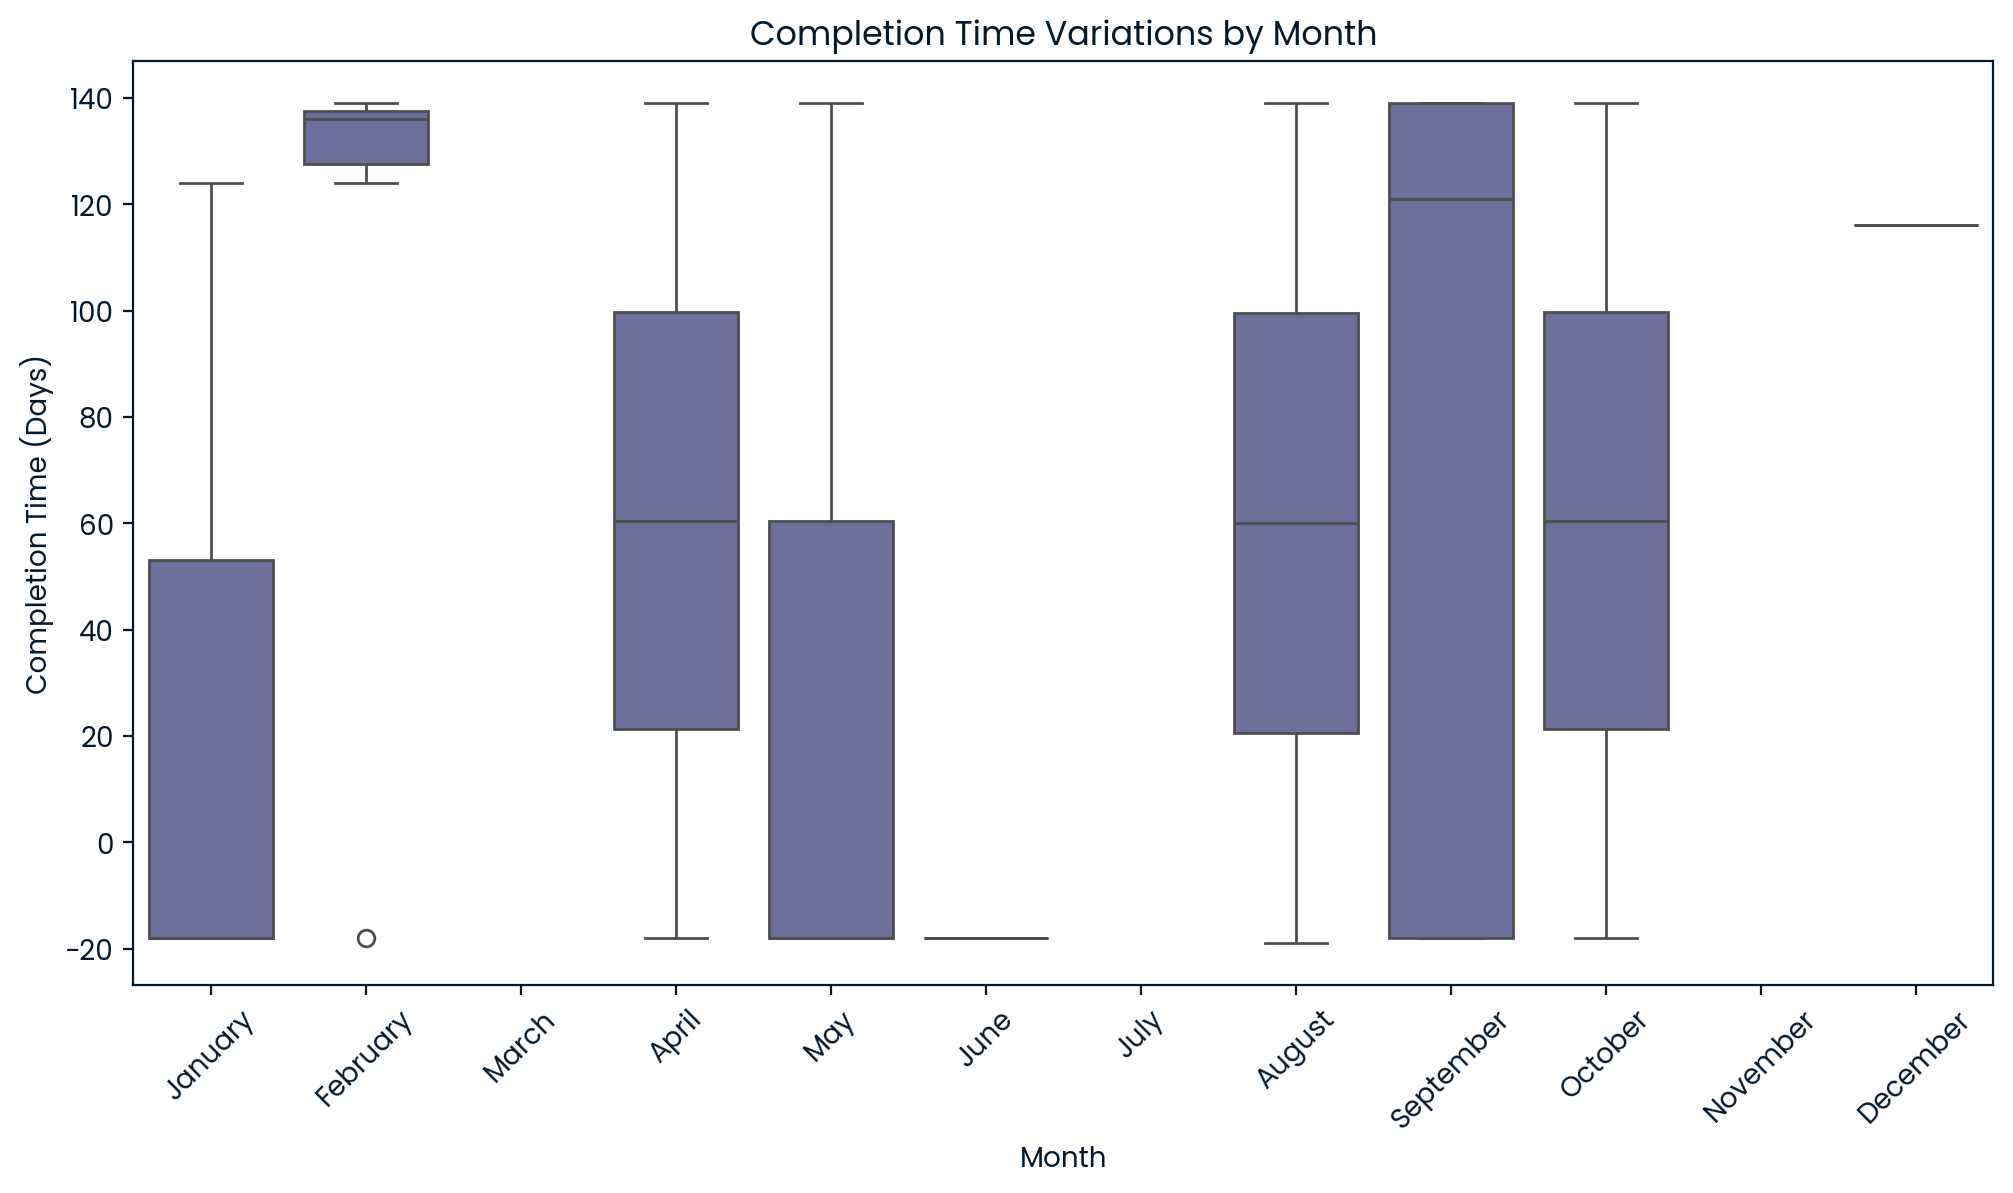

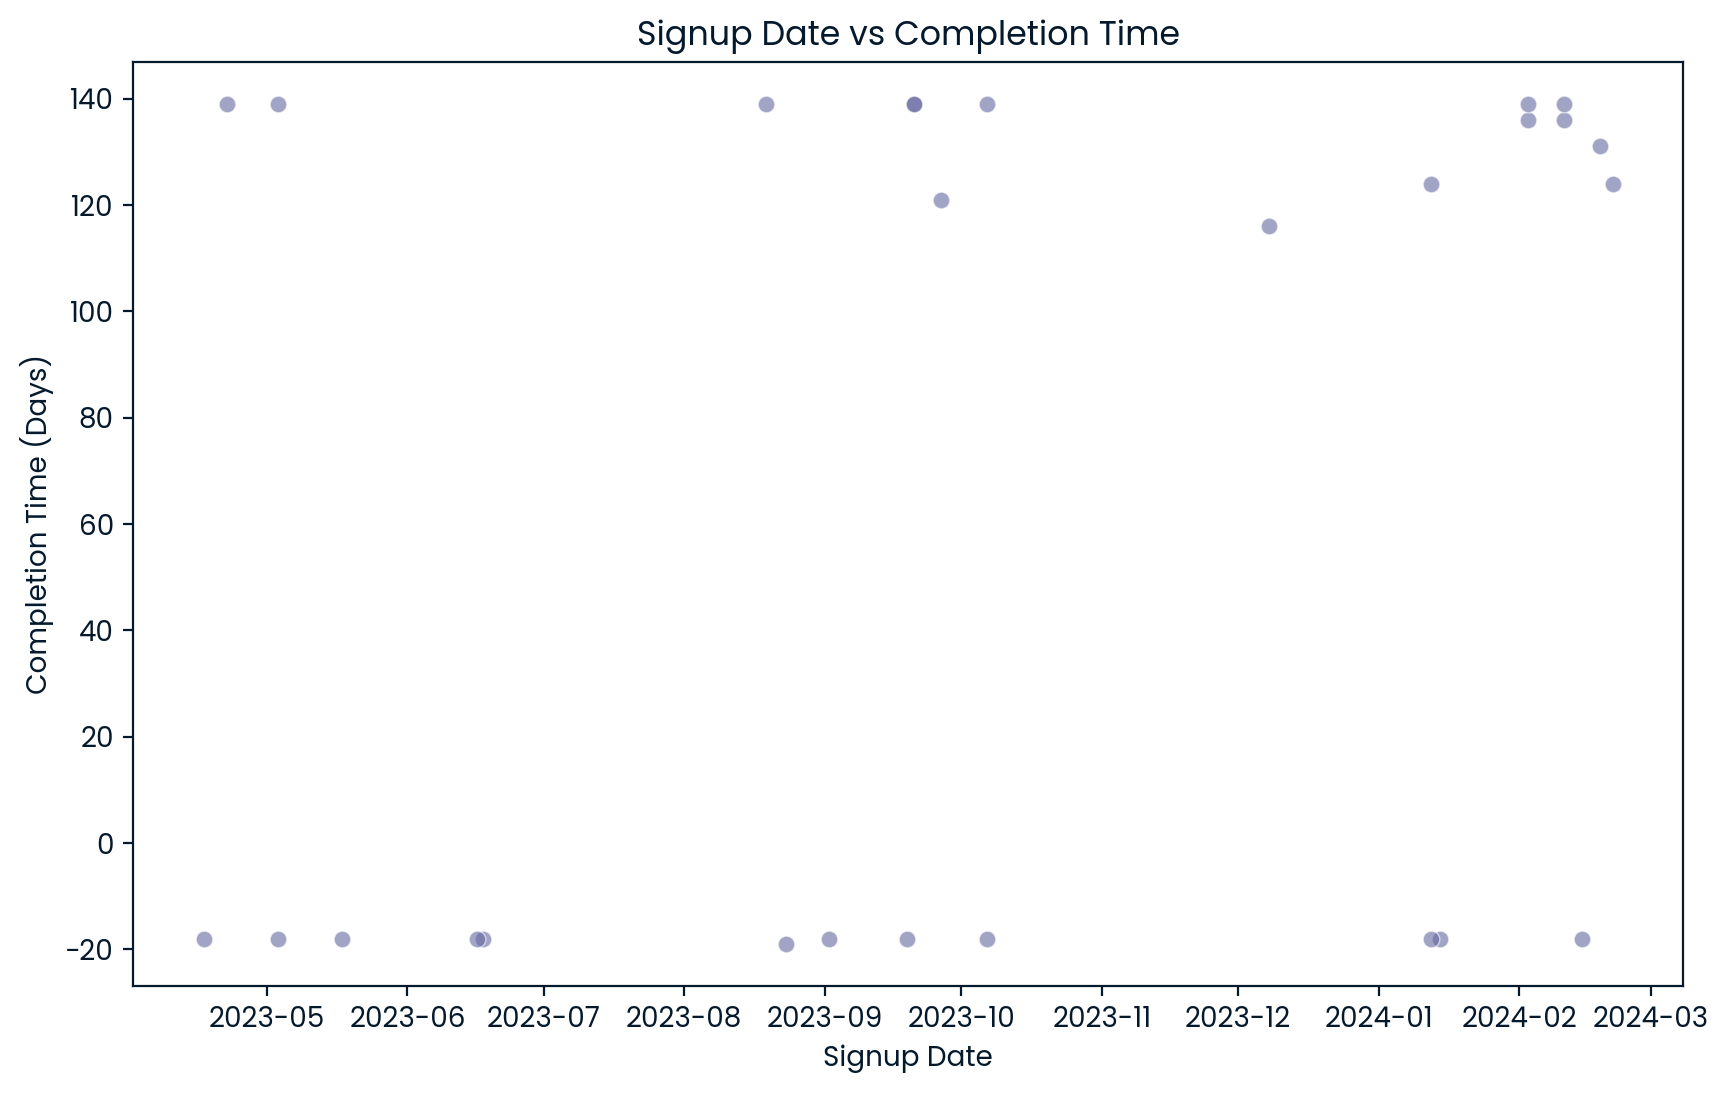

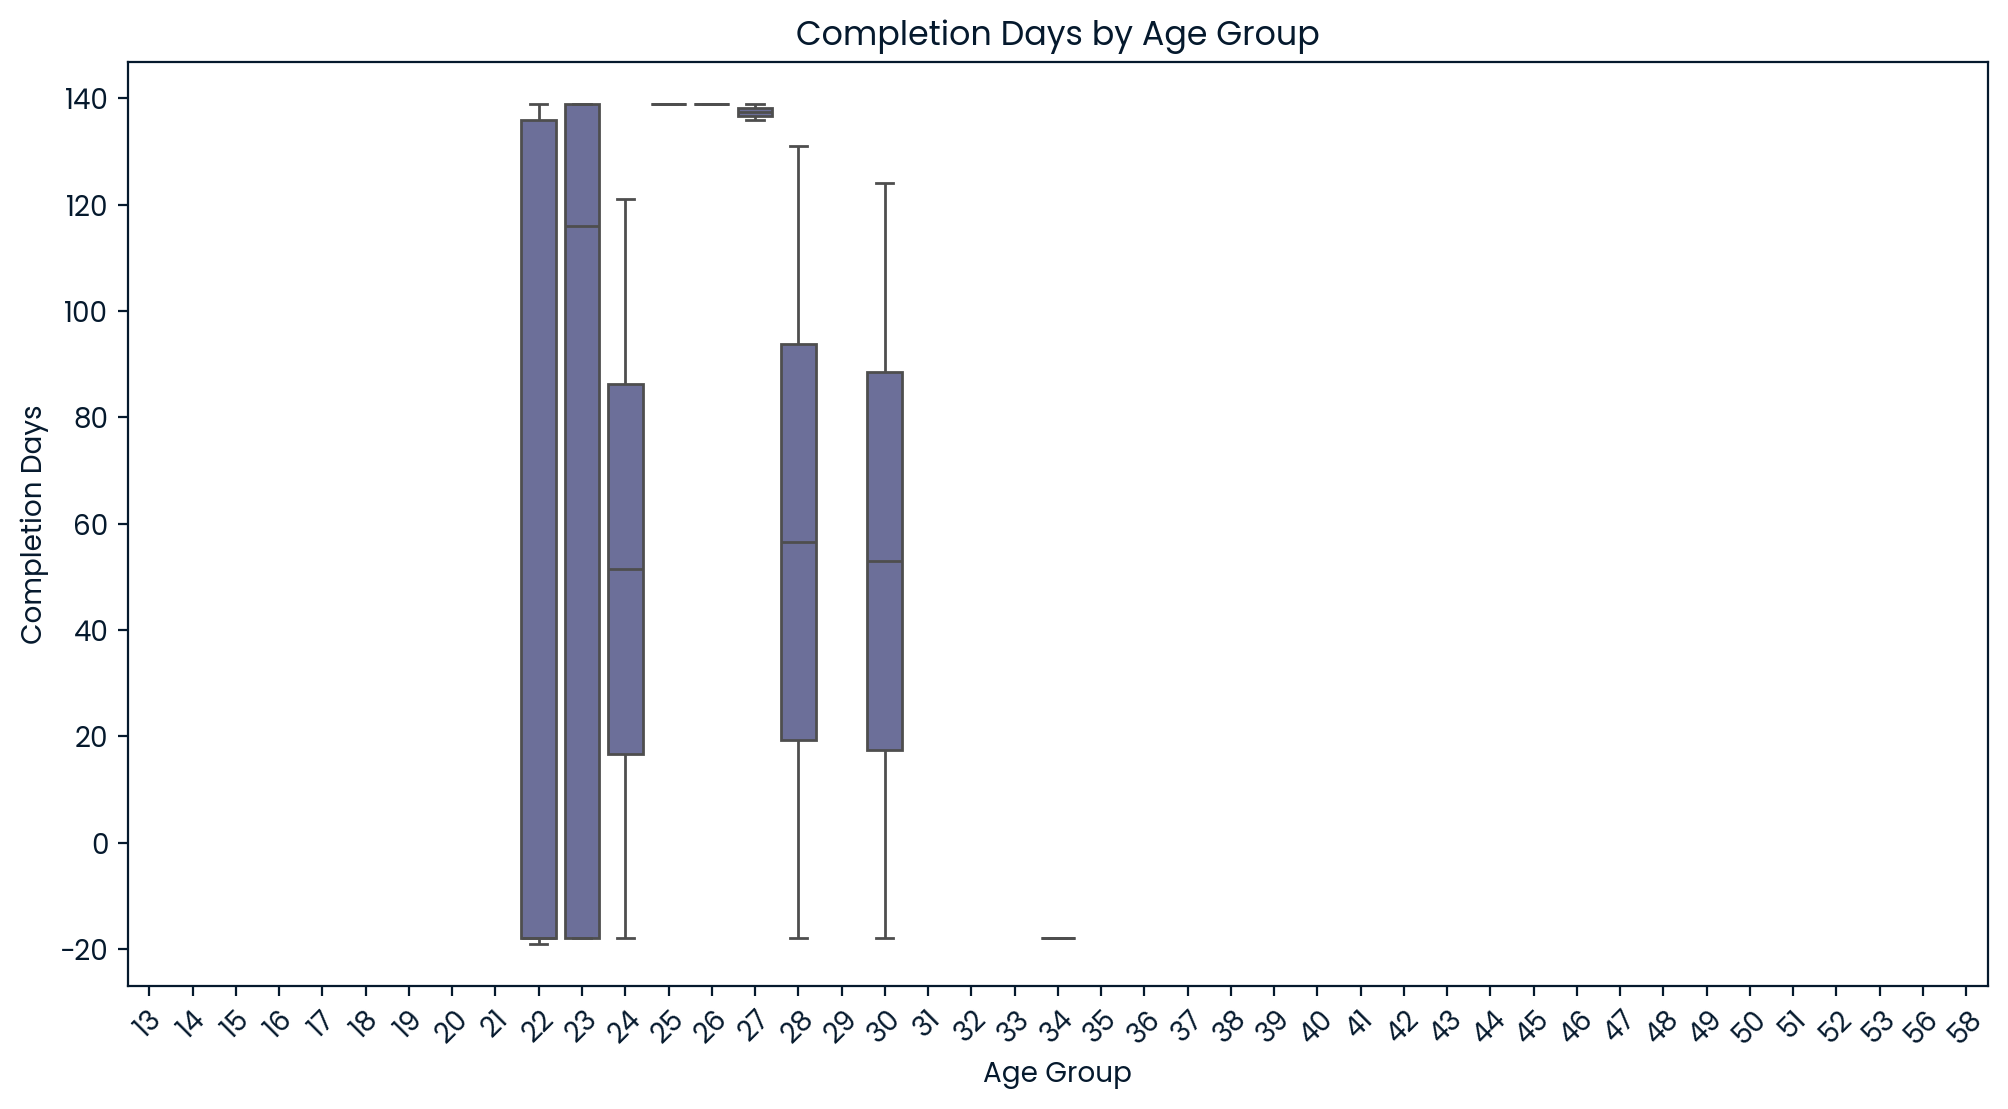

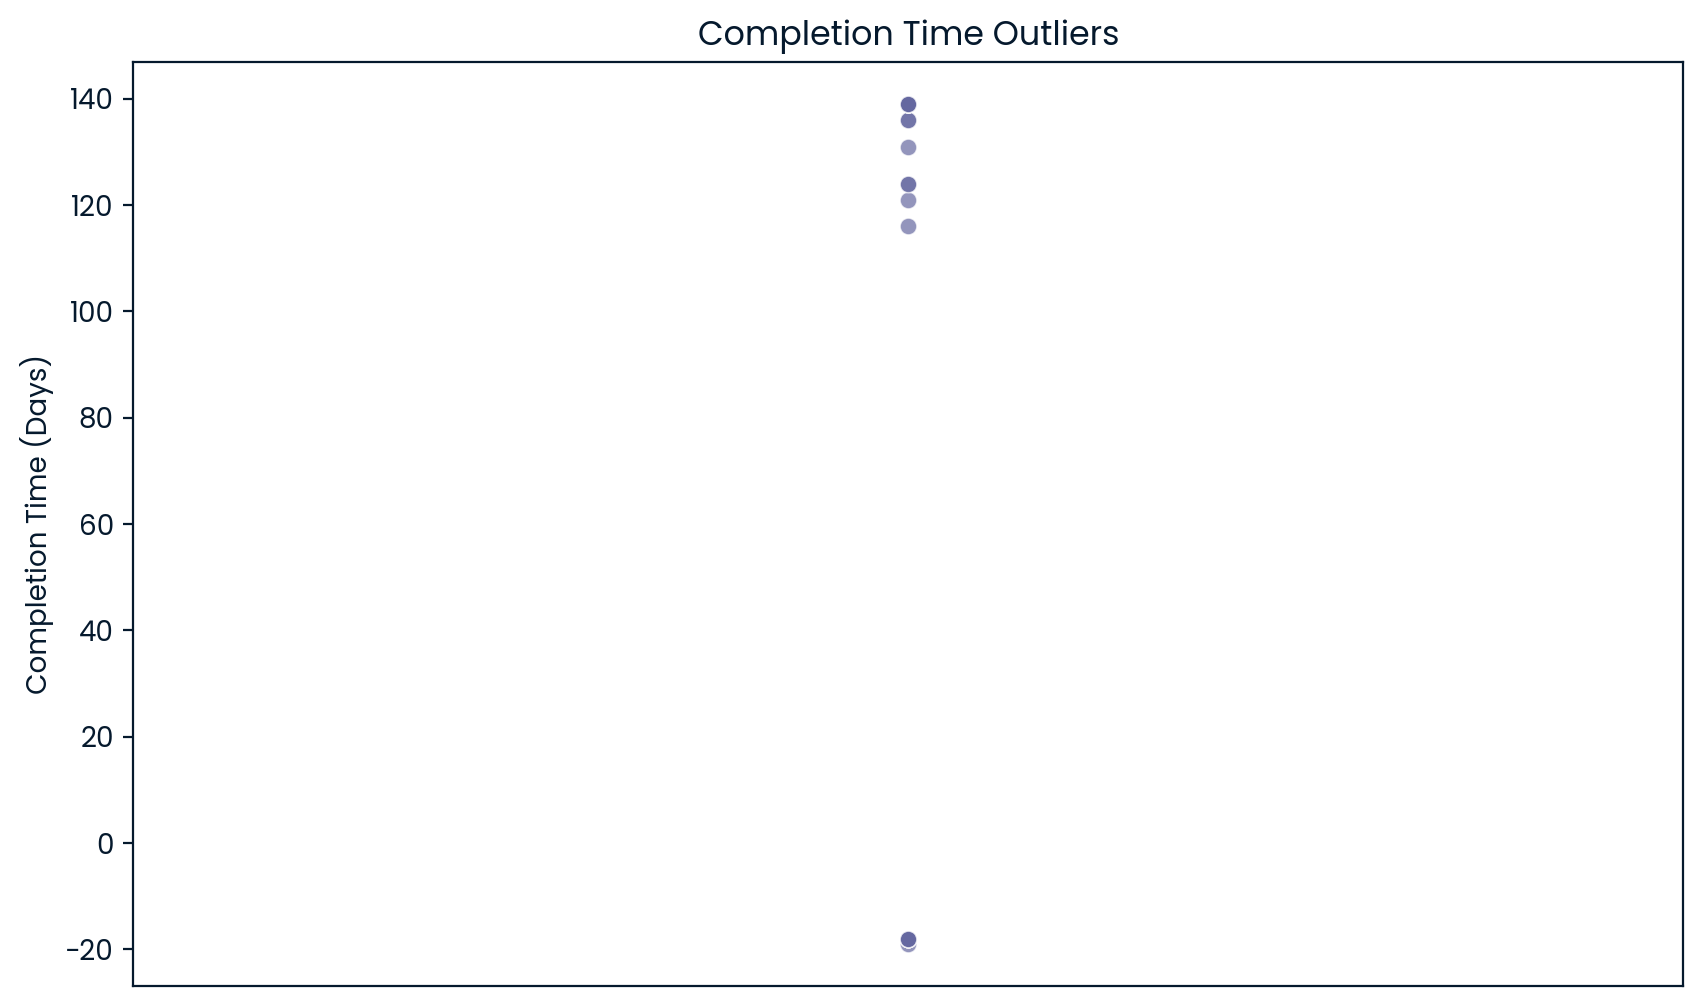

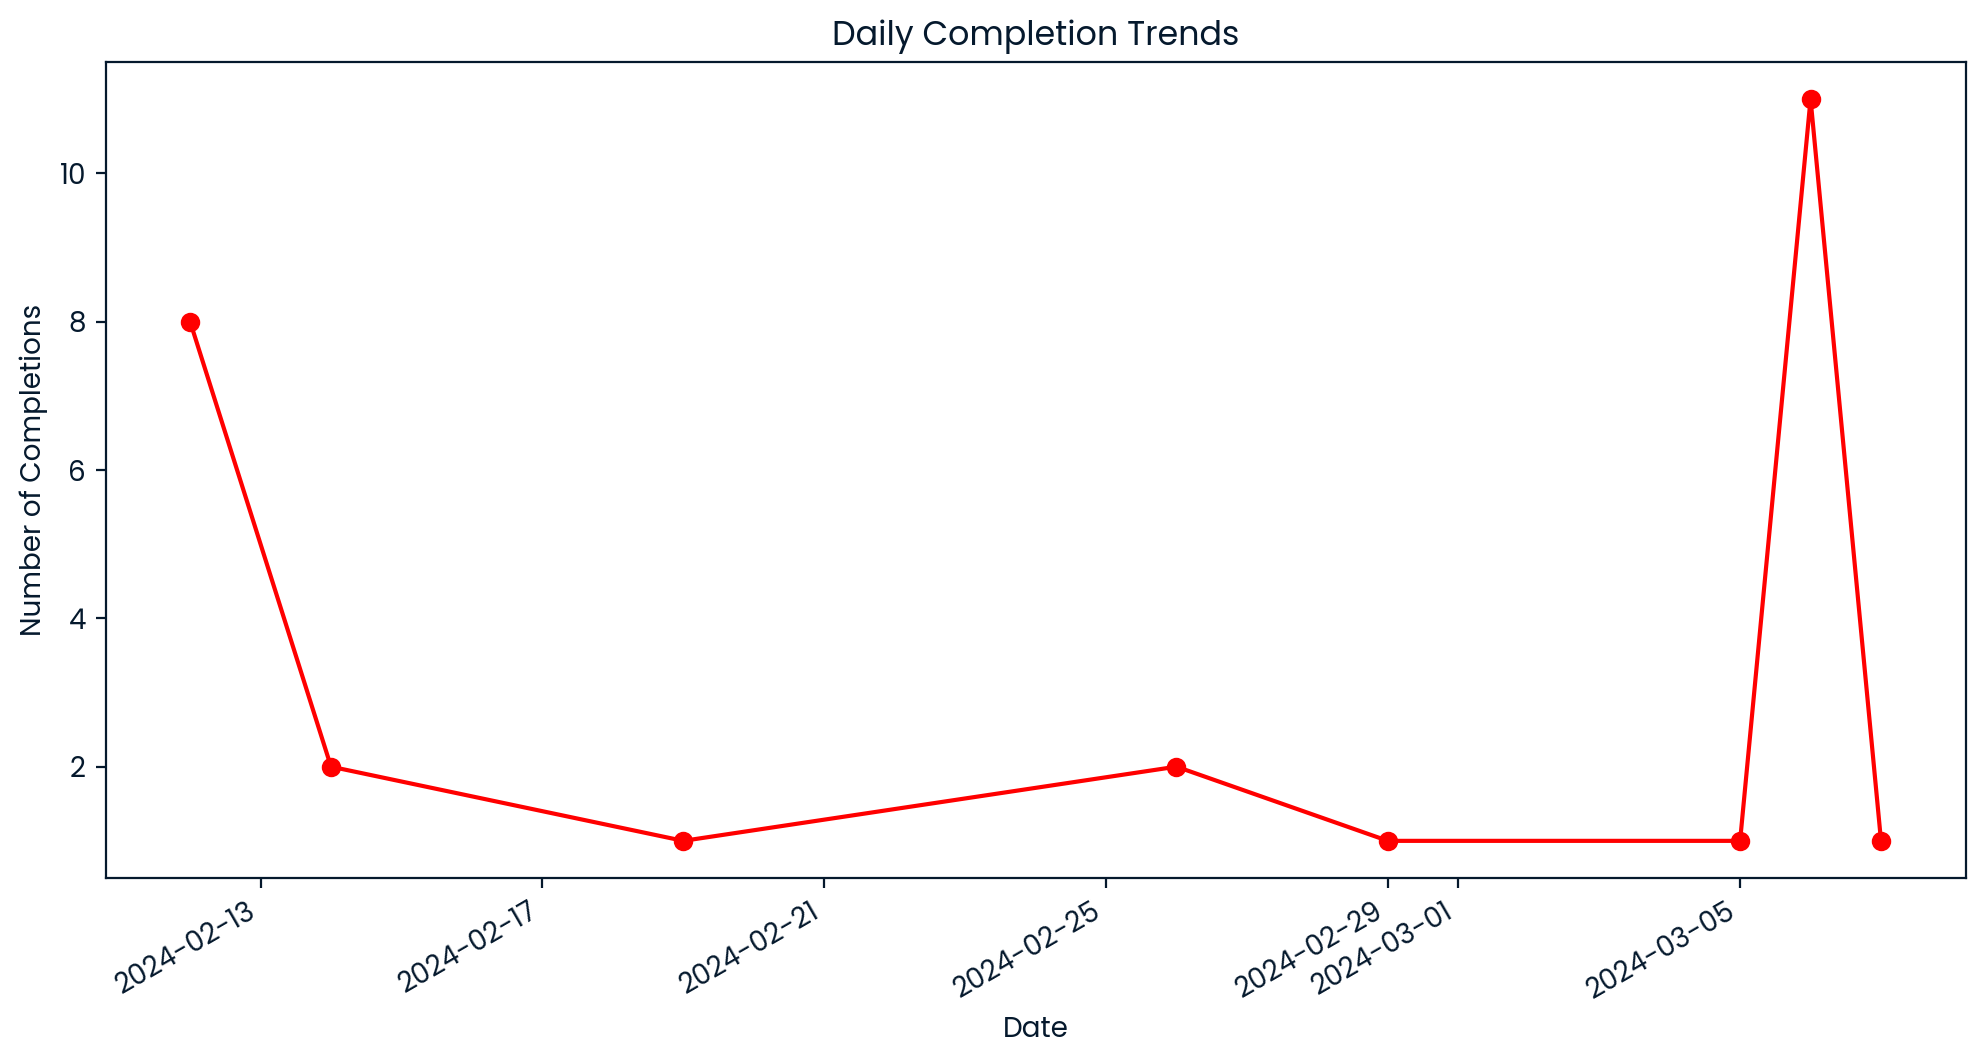

Total Signups: 8202
Completed Opportunities: 27
Completion Rate: 0.33%
Completion Time Mean: 228.22 days
Completion Time Median: 328.0 days
Completion Time Mode: 17.0 days
Correlations:
                         SignUp Year  SignUp Month  Completion Time (Days)
SignUp Year                1.000000     -0.775176                0.307476
SignUp Month              -0.775176      1.000000               -0.081290
Completion Time (Days)     0.307476     -0.081290                1.000000


In [3]:
import pandas as pd

file_path = 'learner_engagement.csv'
learner_engagement_df = pd.read_csv(file_path)

# Remove duplicates
learner_engagement_df.drop_duplicates(inplace=True)

# Handle missing values
# Fill missing categorical values with 'Unknown' and numeric with median or zero
for column in learner_engagement_df.columns:
    if learner_engagement_df[column].dtype == 'object':
        learner_engagement_df[column].fillna('Unknown', inplace=True)
    else:
        learner_engagement_df[column].fillna(learner_engagement_df[column].median(), inplace=True)

# Correct data types
# Convert date columns to datetime format
learner_engagement_df['Learner SignUp DateTime'] = pd.to_datetime(learner_engagement_df['Learner SignUp DateTime'], errors='coerce')
learner_engagement_df['Opportunity End Date'] = pd.to_datetime(learner_engagement_df['Opportunity End Date'], errors='coerce')

# Drop unnecessary columns
columns_to_drop = ['Profile Id', 'First Name', 'Last Name']
learner_engagement_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Save the cleaned dataset
cleaned_file_path = 'cleaned_learner_engagement.csv'
learner_engagement_df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
file_path = 'cleaned_learner_engagement.csv'
cleaned_df = pd.read_csv(file_path)

# Convert columns to datetime
cleaned_df['Learner SignUp DateTime'] = pd.to_datetime(cleaned_df['Learner SignUp DateTime'], errors='coerce')
cleaned_df['Opportunity End Date'] = pd.to_datetime(cleaned_df['Opportunity End Date'], errors='coerce')
cleaned_df['Completion Date'] = pd.to_datetime(cleaned_df['Completion Date'], errors='coerce')
cleaned_df['SignUp Year'] = cleaned_df['Learner SignUp DateTime'].dt.year.astype(str)
cleaned_df['SignUp Month'] = cleaned_df['Learner SignUp DateTime'].dt.month_name()
cleaned_df['Completion Time (Days)'] = (cleaned_df['Opportunity End Date'] - cleaned_df['Completion Date']).dt.days

# Create data logic column
if 'Completion' not in cleaned_df.columns:
    cleaned_df['Completion'] = cleaned_df['Completion Time (Days)'].notna()

# 2. Signup Trends Analysis
# 2.1 Growth (Signup Growth Over Time)
signups_by_month = cleaned_df['Learner SignUp DateTime'].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(12, 6))
signups_by_month.plot(kind='line', marker='o', title='Monthly Signup Growth Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

# 2.2 Seasonality (Signup Peaks Heatmap)
# Extract year and month for heatmap plotting
cleaned_df['Year'] = cleaned_df['Learner SignUp DateTime'].dt.year
cleaned_df['Month'] = cleaned_df['Learner SignUp DateTime'].dt.month

# Heatmap for signups by month and year
heatmap_data = cleaned_df.groupby(['Year', 'Month']).size().unstack()

# Month names for x-axis
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu', 
    annot=True, 
    fmt=".0f", 
    cbar_kws={'label': 'Number of Signups'}, 
    linewidths=0.5,       # Set linewidth for grid
    linecolor='gray'      # Set color for grid lines
)

# Set title and labels
plt.title('Signup Seasonality Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')

# Set x-ticks with month names centered
plt.xticks(ticks=[x + 0.5 for x in range(12)], labels=month_names, rotation=45, ha='center')
# Set y-ticks with integer years and centered alignment
plt.yticks(ticks=[y + 0.5 for y in range(len(heatmap_data.index))], labels=heatmap_data.index.astype(int), rotation=0)

plt.show()

# 2.3 Spikes and Drops in Signup Trends
plt.figure(figsize=(12, 6))
signups_by_month.plot(kind='bar', color='skyblue')
plt.title('Monthly Signup Spikes and Drops')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

# 3. Completion Trends Analysis
# 3.1 Stability in Completion Rates
completion_rate_by_month = cleaned_df.groupby(cleaned_df['Learner SignUp DateTime'].dt.to_period("M"))['Completion'].mean()

plt.figure(figsize=(12, 6))
completion_rate_by_month.plot(kind='line', marker='o', title='Completion Rate Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Completion Rate')
plt.show()

# 3.2 Variations in Completion Times
plt.figure(figsize=(12, 6))
sns.boxplot(x=cleaned_df['SignUp Month'], y=cleaned_df['Completion Time (Days)'], order=['January', 'February', 'March', 
                                                                                         'April', 'May', 'June', 'July', 
                                                                                         'August', 'September', 'October', 
                                                                                         'November', 'December'])
plt.title('Completion Time Variations by Month')
plt.xlabel('Month')
plt.ylabel('Completion Time (Days)')
plt.xticks(rotation=45)
plt.show()

# 4. Patterns and Correlations
# 4.1 Signup vs. Completion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df['Learner SignUp DateTime'], y=cleaned_df['Completion Time (Days)'], alpha=0.6)
plt.title('Signup Date vs Completion Time')
plt.xlabel('Signup Date')
plt.ylabel('Completion Time (Days)')
plt.show()

# 4.2 Age demographic analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Calculation', y='Completion Time (Days)', data=cleaned_df)
plt.title('Completion Days by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Completion Days')
plt.xticks(rotation=45)
plt.show()

# 5. Outliers and Anomalies
# 5.1 Completion Time Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=[0] * len(cleaned_df), y=cleaned_df['Completion Time (Days)'], alpha=0.7)
plt.title('Completion Time Outliers')
plt.ylabel('Completion Time (Days)')
plt.xticks([])  # Hide x-axis as it's not meaningful here
plt.show()

# Identify low completion days
import matplotlib.dates as mdates
completions_by_day = cleaned_df.groupby(cleaned_df['Completion Date'].dt.date)['Completion'].count()

plt.figure(figsize=(12, 6))
completions_by_day.plot(kind='line', marker='o', color='red')
plt.title('Daily Completion Trends')
plt.xlabel('Date')
plt.ylabel('Number of Completions')

# Format x-axis with actual dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Slant dates for readability
plt.show()

# Convert date columns to datetime format for analysis
cleaned_df['Learner SignUp DateTime'] = pd.to_datetime(cleaned_df['Learner SignUp DateTime'], errors='coerce')
cleaned_df['Opportunity End Date'] = pd.to_datetime(cleaned_df['Opportunity End Date'], errors='coerce')
cleaned_df['Completion Date'] = pd.to_datetime(cleaned_df['Completion Date'], errors='coerce')
cleaned_df['Opportunity Start Date'] = pd.to_datetime(cleaned_df['Opportunity Start Date'], errors='coerce')

# Calculate Signup and Completion Rates
cleaned_df['Completion Time (Days)'] = (cleaned_df['Completion Date'] - cleaned_df['Opportunity Start Date']).dt.days

# Total signups
total_signups = len(cleaned_df)

# Completion rate
completed_opportunities = cleaned_df['Completion Date'].notna().sum()
completion_rate = completed_opportunities / total_signups * 100

print(f"Total Signups: {total_signups}")
print(f"Completed Opportunities: {completed_opportunities}")
print(f"Completion Rate: {completion_rate:.2f}%")

# Calculate Descriptive Statistics (Mean, Median, Mode)
completion_time_mean = cleaned_df['Completion Time (Days)'].mean()
completion_time_median = cleaned_df['Completion Time (Days)'].median()
completion_time_mode = cleaned_df['Completion Time (Days)'].mode()[0]

print(f"Completion Time Mean: {completion_time_mean:.2f} days")
print(f"Completion Time Median: {completion_time_median} days")
print(f"Completion Time Mode: {completion_time_mode} days")

# Extract signup year and month for correlation analysis
cleaned_df['SignUp Year'] = cleaned_df['Learner SignUp DateTime'].dt.year
cleaned_df['SignUp Month'] = cleaned_df['Learner SignUp DateTime'].dt.month

# Correlation between SignUp Year, Month, and Completion Time
correlations = cleaned_df[['SignUp Year', 'SignUp Month', 'Completion Time (Days)']].corr()
print("Correlations:\n", correlations)